Norm Matrix (Frobenius norm across lags):
[[0.17760965 0.27133516 0.16342348]
 [0.16362244 0.17725894 0.12025413]
 [0.28062158 0.19880982 0.18977627]]


/var/folders/vq/wcv9l2jd4hd5287qdhm073800000gp/T/ipykernel_31974/2927570214.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + list(df.columns))
/var/folders/vq/wcv9l2jd4hd5287qdhm073800000gp/T/ipykernel_31974/2927570214.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + list(df.columns))


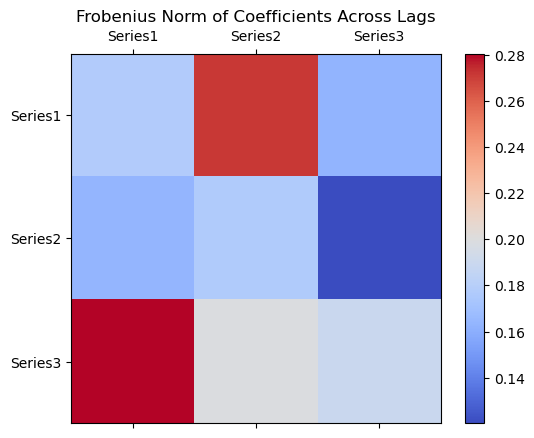

In [6]:
import numpy as np
import pandas as pd
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
import networkx as nx

# Step 1: Generate sample data
np.random.seed(0)
n_obs = 100
data = np.random.randn(n_obs, 3)
dates = pd.date_range('20200101', periods=n_obs)
df = pd.DataFrame(data, columns=['Series1', 'Series2', 'Series3'], index=dates)

# Step 2: Fit the VAR model


num_variables = 3
num_lags = 3
model = VAR(df)
results = model.fit(num_lags)

# Step 3: Extract coefficients for each lag and compute the norm

coeff_matrices = np.zeros((num_lags, num_variables, num_variables))

for i in range(num_lags):
    coeff_matrices[i, :, :] = results.params.loc[[f'L{i+1}.Series{j}' for j in range(1, num_variables + 1)]].values.reshape(num_variables, num_variables)

# Calculate Frobenius norm across lags for each pair of variables
norm_matrix = np.zeros((num_variables, num_variables))
for i in range(num_variables):
    for j in range(num_variables):
        norm_matrix[i, j] = np.linalg.norm(coeff_matrices[:, i, j])

# Step 4: Display the resulting norm matrix
print("Norm Matrix (Frobenius norm across lags):")
print(norm_matrix)

# Optionally visualize the norm matrix
fig, ax = plt.subplots()
cax = ax.matshow(norm_matrix, cmap='coolwarm')
fig.colorbar(cax)
ax.set_xticklabels([''] + list(df.columns))
ax.set_yticklabels([''] + list(df.columns))
plt.title('Frobenius Norm of Coefficients Across Lags')
plt.show()


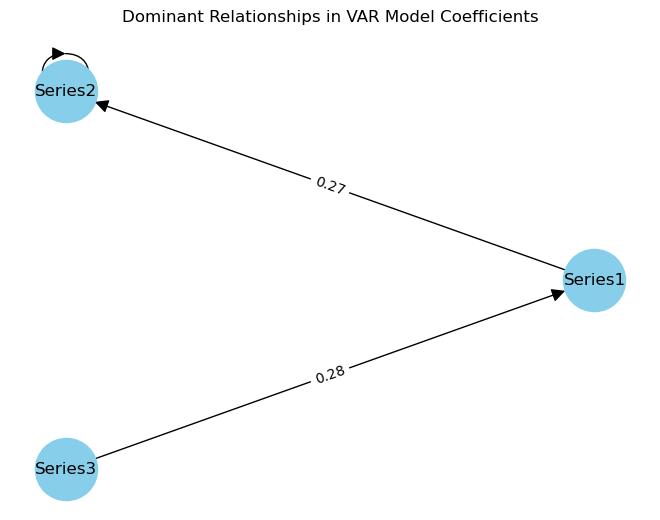

In [8]:
# Step 4: Create a directed graph based on the largest norm in each row
G = nx.DiGraph()
labels = df.columns

for i in range(num_variables):
    row = norm_matrix[i, :]
    max_col_index = np.argmax(row)  # Index of the max element in the i-th row
    if row[max_col_index] > 0:  # Only add an edge if the maximum value is non-zero
        G.add_edge(labels[i], labels[max_col_index], weight=round(row[max_col_index], 2))

# Draw the graph
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=12, arrowstyle='-|>', arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Dominant Relationships in VAR Model Coefficients')
plt.show()

